##**Defining the Question.**
The project requires us to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier. 

##**a) Specifying the Question**

Build a model that determines whether or not the passenger survived or not.

##**b) Defining the Metric for Success**

* Load and Analyze data. 
* Normalize data as it has different units. 
* Create KNN model classifier
* Create random forest classifier model to depict accuracy.
* Challenge the model with other models and check accuracy change.

##**c) Understanding the context**
Use KNN and Naives Bayes classifier to:

Build a model that determines whether or not Build a model that determines whether or not the passenger survived or not.

Detect spam in spambase dataset

##**d) Recording the Experimental Design**

(CRISP- DM) methodology

Get the data

understand the data

Clean the data

Explore the data

Create models

Challenge model

Evaluate model perfomance

##1. **Data Relevance**

###1.1 **Loading Libraries**

In [0]:
#Import pandas libraries
import pandas as pd

#Import numpy libraries
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import sklearn libraries

from sklearn import metrics
#  import classifier libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report

#Import warnings filter libraries
import warnings
warnings.filterwarnings('ignore')

### 1.2 **Load Dataset**

**Dataset Dictionary**

1. survival - Survival (0 = No; 1 = Yes)

2. class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

3. name - Name

4. sex - Sex

5. age - Age

6. sibsp - Number of Siblings/Spouses Aboard

7. parch - Number of Parents/Children Aboard

8. ticket - Ticket Number

9. fare - Passenger Fare

10. cabin - Cabin

11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

12. boat - Lifeboat (if survived)

13. body - Body number (if did not survive and body was recovered)

###**1.3 Data Evaluation**

In [4]:
#Load train  dataset
df_train= pd.read_csv('train.csv')

# Check shape of the dataset
df_train.shape

(891, 12)



*   Our dataset has 12 columns and 891 rows.




In [5]:
#Check the first five rows of our dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Load test dataset
df_test= pd.read_csv('test.csv')

#Check shape
df_test.shape

(418, 11)



*   Our dataset has 11 columns and 418 rows.



### **Using Train Dataset**

In [7]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### **1.4 Data Exploration**

In [8]:
#Check the data types
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
#Check the metrics of our dataset
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000




*  Most ages are 28 and in pclass 3 
*38% out of the training-set survived the Titanic.



Will drop the PassengerID,Fare, Cabin, Ticket columns as they don't have any use in my goal from the titanic dataset.


In [8]:
df_train = df_train.drop(['Fare'], axis = 1)
df_train = df_train.drop(['Cabin'], axis = 1)
df_train = df_train.drop(['Ticket'], axis = 1)
df_train = df_train.drop(['PassengerId'], axis = 1)
df_train = df_train.drop(['Name'], axis = 1)

#Confirm they have been dropped.
df_train.columns



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

###**1.5 Data Cleaning**

In [9]:
#Check null values

df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

Our dataset has some null values for columns age and embarked.

### **1.4 Replace missing values**

In [0]:
#Replace age with the mean
df_train['Age'].fillna(df_train['Age'].median(),inplace = True)

In [11]:
print(df_train['Embarked'].mode())

#Replace with the mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace = True)

0    S
dtype: object


In [12]:
#Confirm that the missing values have been removed
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [114]:
#Confirm that the missing value for embarked column has been replaced  
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [115]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Embarked     object
Family        int64
dtype: object

* We convert the object types to numeric

In [0]:
#change non-numerical value to numerical values
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1}).astype(int)
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)





   **Note**
*   Female = 0
*   Male = 1
*   S = 0
*   C = 1
*   Q = 2







In [117]:
#Confirm they have been converted.
df_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Embarked      int64
Family        int64
dtype: object

I have created another column for the total number of people in the family  by adding SibSp, Parch, and 1 (for the passenger).

In [0]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1

In [0]:
#Drop the SibSp and Parch column
df_train = df_train.drop(('SibSp'),axis = 1)
df_train = df_train.drop(('Parch'),axis = 1)

In [17]:
df_train

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,0,2
1,1,1,0,38.0,1,2
2,1,3,0,26.0,0,1
3,1,1,0,35.0,0,2
4,0,3,1,35.0,0,1
...,...,...,...,...,...,...
886,0,2,1,27.0,0,1
887,1,1,0,19.0,0,1
888,0,3,0,28.0,0,4
889,1,1,1,26.0,1,1


##**2. EDA Analysis**


###**2.1 Univariate Analysis**

###**Barplot**

Text(0.5, 1.0, 'Distribution of survivors according to Pclass')

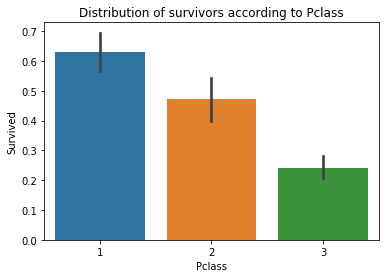

In [39]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Distribution of survivors according to Pclass')

* The Pclass = 1 has the most survival rates.

In [103]:
#Check how many adults, teenagers and children were in the titanic ship

print ("Passengers who are adults are : ",str(len(df_train[df_train["Age"] >= 18])))

Passengers who are adults are :  778


In [18]:
#People less than 18yrs
print ("Passengers who are less than 18years are : ",str(len(df_train[df_train["Age"] < 18 ])))


Passengers who are teenagers are :  113


In [105]:
#People who  are children
print ("Passengers who were children are : ",str(len(df_train[df_train["Age"] < 13])))

Passengers who were children are :  69


####**HeatMap**

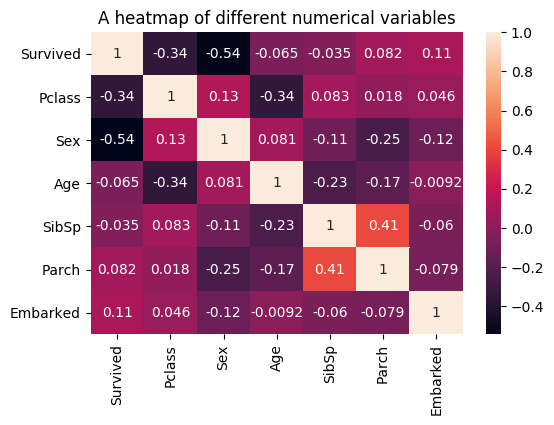

In [70]:
#  checking for correlation of numerical variables

plt.figure(dpi=100)

sns.heatmap(df_train.corr(),annot=True)
plt.title('A heatmap of different numerical variables')

plt.show()

###**Boxplot**

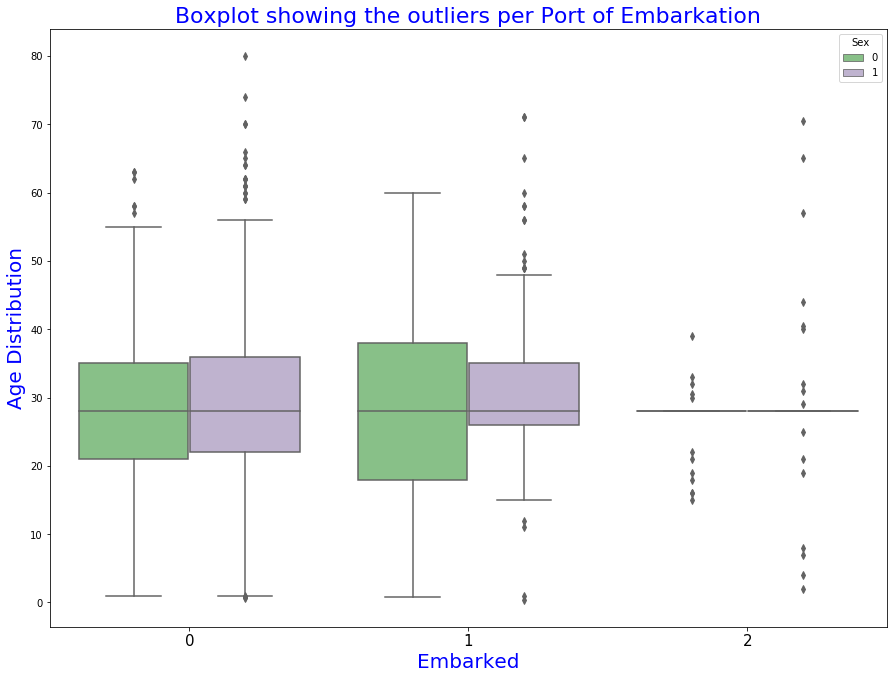

In [72]:
plt.figure(figsize = (15,11))
sns.boxplot(df_train['Embarked'],df_train['Age'] , hue = df_train['Sex'], palette = 'Accent')
plt.ylabel('Age Distribution', fontsize = 20, color = 'blue')
plt.xticks(fontsize = 15)
plt.xlabel('Embarked',fontsize = 20, color = 'blue')
plt.title('Boxplot showing the outliers per Port of Embarkation', fontsize = 22, color = 'blue')
plt.show()




*   **Findings**
*  The was alot of old passengers who embarked the ship at port S compared to C and Q 
* Port Q saw many young males embark the ship compared to S and Q.
* At port S and Q more male embarked the ship than female while at port C more female embarked the ship than male.
* Few passengers Embarked the ship at Port Q compared to both C and S.


###**Histogram**

Text(0.5, 1.0, 'Distribution of people who survived or not')

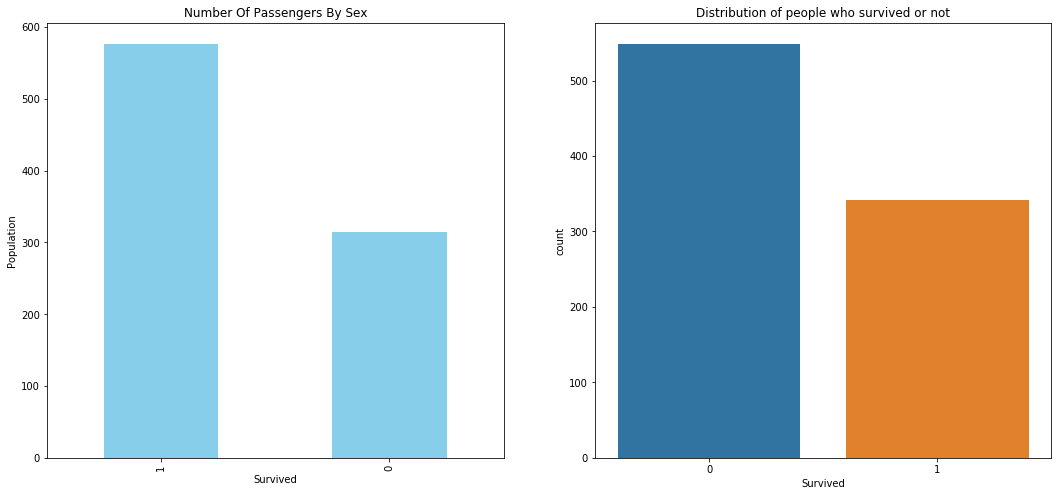

In [87]:

#Check the number of passengers by sex and their survival rate.
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
ax[0].set_xlabel('Survived')
sns.countplot("Survived", data = df_train)
plt.title('Distribution of people who survived or not')

**Findings**
* Most passengers were male.
* Most passengers didn't survive the titanic

###**Stacked Bar**

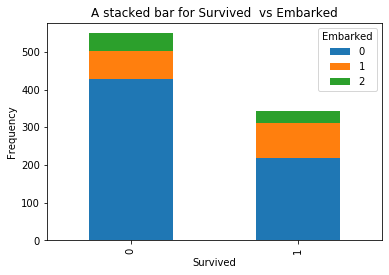

In [93]:
df_train.groupby(['Survived','Embarked']).size().unstack().plot(kind='bar',stacked=True)
plt.title('A stacked bar for Survived  vs Embarked')
plt.ylabel('Frequency')
plt.show()

**Findings**
* Most people who didn't survive came from Port of Embarkation S = Southampton followed by  C = Cherbourg; Q = Queenstown 



###**Factorplot**

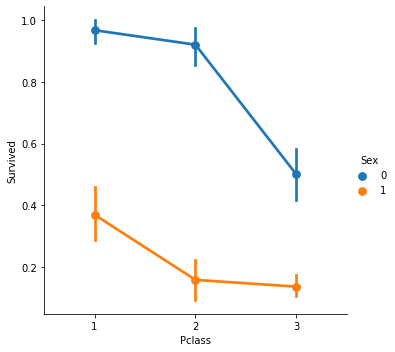

In [90]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = df_train)
plt.show()

**Findings**
* Most passengers were male as compared to females.
* Pclass 3 had the lowest number of passengers who survived.

###**Piechart**

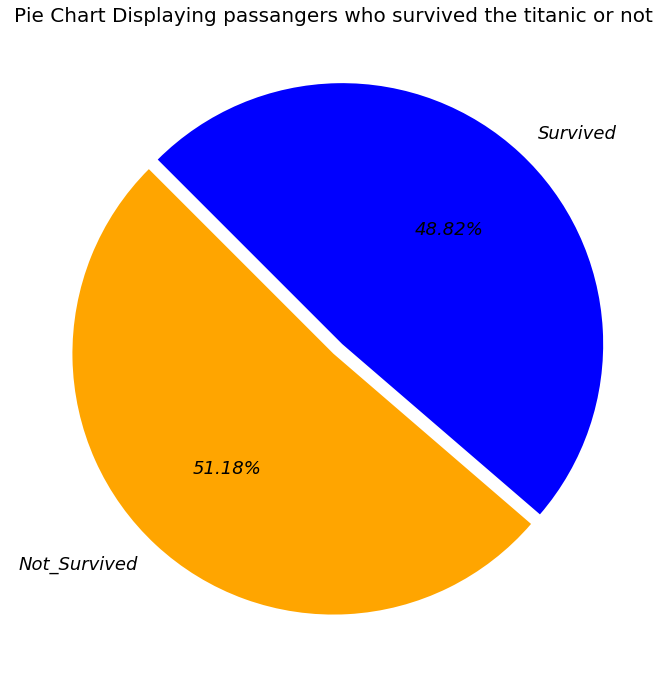

In [146]:
survive = df_train.groupby(['Survived'])['Survived'].count()
survive
plt.figure(figsize = (16, 12))
explode = (0,0.05)
labels = (['Not_Survived' , 'Survived'])
colors = ['Orange','Blue']
plt.pie(survive.values, labels = labels, explode = explode, autopct = '%1.2f%%', colors = colors, startangle = 135, textprops = {'color':'black', 'style': 'oblique', 'size':18})
plt.title('Pie Chart Displaying passangers who survived the titanic or not', fontsize = 20)
plt.show()

###**2.1 Checking for anomalies**

In [19]:
# Check for sum of duplicated rows
df_train.duplicated().sum()

321

###**2.4 Bivariate Analysis**

##**3. Data Preprocessing**

In [0]:

X = df_train.drop(['Survived'], axis=1)
X
y = df_train['Survived']


Now we split the dataset into two parts i.e 80 - 20  sets.

In [23]:

#Split our dataset train dataset size is 80% test datset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape)

(372, 5) (93, 5)


In [24]:
print(X_train.head(4))

     Pclass  Sex   Age  Embarked  Family
247       2    0  24.0         0       3
728       2    1  25.0         0       2
796       1    0  49.0         0       1
820       1    0  52.0         0       3


In [25]:
#Confirm there is no nan in train dataset.
np.any(np.isnan(X_train))

False

In [26]:
# Confirm there is no nan in  test dataset
np.any(np.isnan(X_test))

False

###**3.1 Feature scaling**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization.

We need to normalize our independent variables. We use robust scaler to do this.

In [0]:
#Use robust scaler to normalize our dataset
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

##**4.Perfoming KNN** - Baseline Model

KNN would search for one nearest observation and find that exact same observation
KNN has memorized the training set.

For our baseline model we shall use k = 5,this is the constant k classifiers used.

In [64]:

# KNN 
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting model
knn.fit(X_train, y_train)

#Predicting the model
y_pred = knn.predict(X_test)  

#Checking accuracy score
print('Accuracy score of KNN model is: ' ,metrics.accuracy_score(y_test, y_pred))



Accuracy score of KNN model is:  0.7096774193548387


In [65]:
#Compute the confusion matrix to understand the actual versus predicted variables.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[32, 14],
       [13, 34]])



*   **Findings**
*   Using K= 5 , our accuracy model predicted 70% accuracy.
*   We can optimize this by changing the K to see if  the model perfomance will change.



###**4.1 Challenging the model**
I tried another different K to see which one is the best to increase the accuracy

In [87]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 4)

# fitting model
knn.fit(X_train, y_train)

#Predicting the model
y_pred = knn.predict(X_test)  

print('Accuracy score of KNN model is: ' ,metrics.accuracy_score(y_test, y_pred))


Accuracy score of KNN model is:  0.7526881720430108


In [88]:
#Compute the confusion matrix
print(confusion_matrix(y_test,y_pred))

print('********************************************************')

#Check the accuracy score of the gradient model
print(classification_report(y_test,y_pred))

[[40  6]
 [17 30]]
********************************************************
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        46
           1       0.83      0.64      0.72        47

    accuracy                           0.75        93
   macro avg       0.77      0.75      0.75        93
weighted avg       0.77      0.75      0.75        93



**Findings**
*   Using K= 4 , our accuracy score increased to  75% accuracy.
*   We can still use other models to see if they will improve our accuracy score and have a better model

###**4.1.1 Random Forest Classifier**

In [68]:
# Run the classifier with n_estimators = 100

rf1 = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=5, min_samples_split = 20)

# fit the model to the training set
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predict on the test set results
y_pred1 = rf1.predict(X_test)


In [70]:
print('Accuracy score of random forest classifier model is: ' ,metrics.accuracy_score(y_test, y_pred1))

Accuracy score of KNN model is:  0.7526881720430108


In [85]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
print(confusion_matrix(y_test,y_pred1))

print('********************************************************')

#Check the accuracy score of the gradient model
print(classification_report(y_test,y_pred1))

[[39  7]
 [16 31]]
********************************************************
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        46
           1       0.82      0.66      0.73        47

    accuracy                           0.75        93
   macro avg       0.76      0.75      0.75        93
weighted avg       0.76      0.75      0.75        93







* **Findings**


*   The model accuracy still remained the same 75% even after using random forest classifier.
*   The model predicted 31 passengers who didn't survive and 39 who did survive 

*   However, we can still improve on the model using gradient boosting and see how it will perfom.






###**4.1.2 Gradient Boosting Classifier**

In [75]:
#Intiate the gradient boosting classifier
gradient = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,max_depth=3,min_samples_split=2) # defining my classifier as  gradient

#fit the train dataset in the classifier
gradient.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [76]:
#Making a prediction
y_pred_g = gradient.predict(X_test)
y_pred_g

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0])

In [83]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
confusion = confusion_matrix(y_test,y_pred_g)
print(confusion)

print('********************************************************')

#Check the accuracy score of the gradient model
print(classification_report(y_test,y_pred_g))

[[34 12]
 [16 31]]
********************************************************
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        46
           1       0.72      0.66      0.69        47

    accuracy                           0.70        93
   macro avg       0.70      0.70      0.70        93
weighted avg       0.70      0.70      0.70        93





*   **Findings**
*   The accuracy score of the model reduced to 70%.

*   The model predicted 31 didn't survive while 34 did survive

*   In this case, we can use KNN model with (K = 4) or random forest classifier model compared to gradient boosting as it's perfomance increased.





#**Part 2**

##**Objectives:**

Determine whether or not a message is spam.


##**Metrics of success:**


   *   Record the various accuracy levels under Naives Bayes classifiers 
   




##**Naive Bayes Classifier**
Naive Bayes is a supervised classification technique based on Bayes' Theorem with an assumption of independence among predictors. That is, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For this classification, we will use the spambase dataset

In [130]:
# Importing our libraries
# 
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
spam = pd.read_csv('spambase.data', header = None)

In [110]:
spam.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.000,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.040,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [111]:
#Determining the shape
spam.shape

(4601, 58)

In [113]:
#Check if there are missing values
spam.isnull().sum().sum()

0

In [0]:
#Grouping X and Y

X = spam.iloc[:,:48]
y= spam.iloc[:,-1]

In [126]:
# Training our Bernoulli Naive Bayes Classifier
# 
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)

0.877852640730276

In [0]:
model = MultinomialNB().fit(X, y)




In [138]:
## Fitting the model

#Creating a list of classifiers to use
classifier = [BernoulliNB(),MultinomialNB()]

for i, j in zip(classifier, ['berneoullib', 'multinomial']):
  
# Training the dataset  
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 0)
  

# Use minmax scaler to scale the data since our dataset has different units  
  sc = MinMaxScaler()

# Fit the data into the model
  X_train= sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  model = i.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  accuracy =  np.mean(y_pred == y_test)
  
  print(j + ' accuracy score is: ' + str(accuracy))

berneoullib accuracy score is: 0.8653637350705755
multinomial accuracy score is: 0.8642779587404995




*   **Findings**
*   Using BernoulliNB Naive Bayes classifier and MultinomialNB, they both gave almost the same accuracy of 86% of the model. 



In [132]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[519  19]
 [106 277]]


* **Findings**

*  The  519 were correctly predicted  to have survived and 19 falsely predicted.


* 277 were accurately predicted to have died and 106 falsely predicted.

##**Further questions**


*   For families that had the same ticket number but different passenger ID, how did the KNN algorithm classify them?








##**Challenges**


*   Despite using different classification models, differences between the model accuracy was very minimal.


*   It was a challenge picking the best model for prediction since they all had almost the same accuracy score.






##**Future prospects**


*   Dataset should be added more feautures to increase the prediction accuracy of our models.

